In [106]:
import pandas as pd
import numpy as np

# Building the dataset

In [107]:
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [108]:
df1 = pd.read_csv('Cleavland.csv',header=None,names=col_names,na_values='?')
df2 = pd.read_csv('hung.csv',header=None,names=col_names,na_values='?')
df3 = pd.read_csv('Switzerland.csv',header=None,names=col_names,na_values='?')

In [109]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(303, 14)
(294, 14)
(123, 14)


In [110]:
df = pd.concat([df1,df2,df3])

In [111]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [112]:
df.shape

(720, 14)

# Data Cleaning

In [113]:
for col in df.columns:
    print(col, df[col].unique())

age [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76. 28. 30. 31. 32. 33. 36. 72. 73.]
sex [1. 0.]
cp [1. 4. 3. 2.]
trestbps [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  98. 190.  nan 113.  92.  95.
  80. 185.]
chol [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 

In [114]:
df.isna().sum()

age           0
sex           0
cp            0
trestbps      3
chol         23
fbs          83
restecg       2
thalach       2
exang         2
oldpeak       6
slope       207
ca          413
thal        320
target        0
dtype: int64

In [115]:
# fill null values with mean and mode
df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)
df['chol'].fillna(df['chol'].mean(), inplace=True)
df['thalach'].fillna(df['thalach'].mean(), inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

df['exang'].fillna(df['exang'].mode()[0], inplace=True)
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)
df['slope'].fillna(df['slope'].mode()[0], inplace=True)

In [116]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Error correcting(Outlier detection and removal)

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       720 non-null    float64
 1   sex       720 non-null    float64
 2   cp        720 non-null    float64
 3   trestbps  720 non-null    float64
 4   chol      720 non-null    float64
 5   fbs       720 non-null    float64
 6   restecg   720 non-null    float64
 7   thalach   720 non-null    float64
 8   exang     720 non-null    float64
 9   oldpeak   720 non-null    float64
 10  slope     720 non-null    float64
 11  ca        720 non-null    float64
 12  thal      720 non-null    float64
 13  target    720 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 84.4 KB


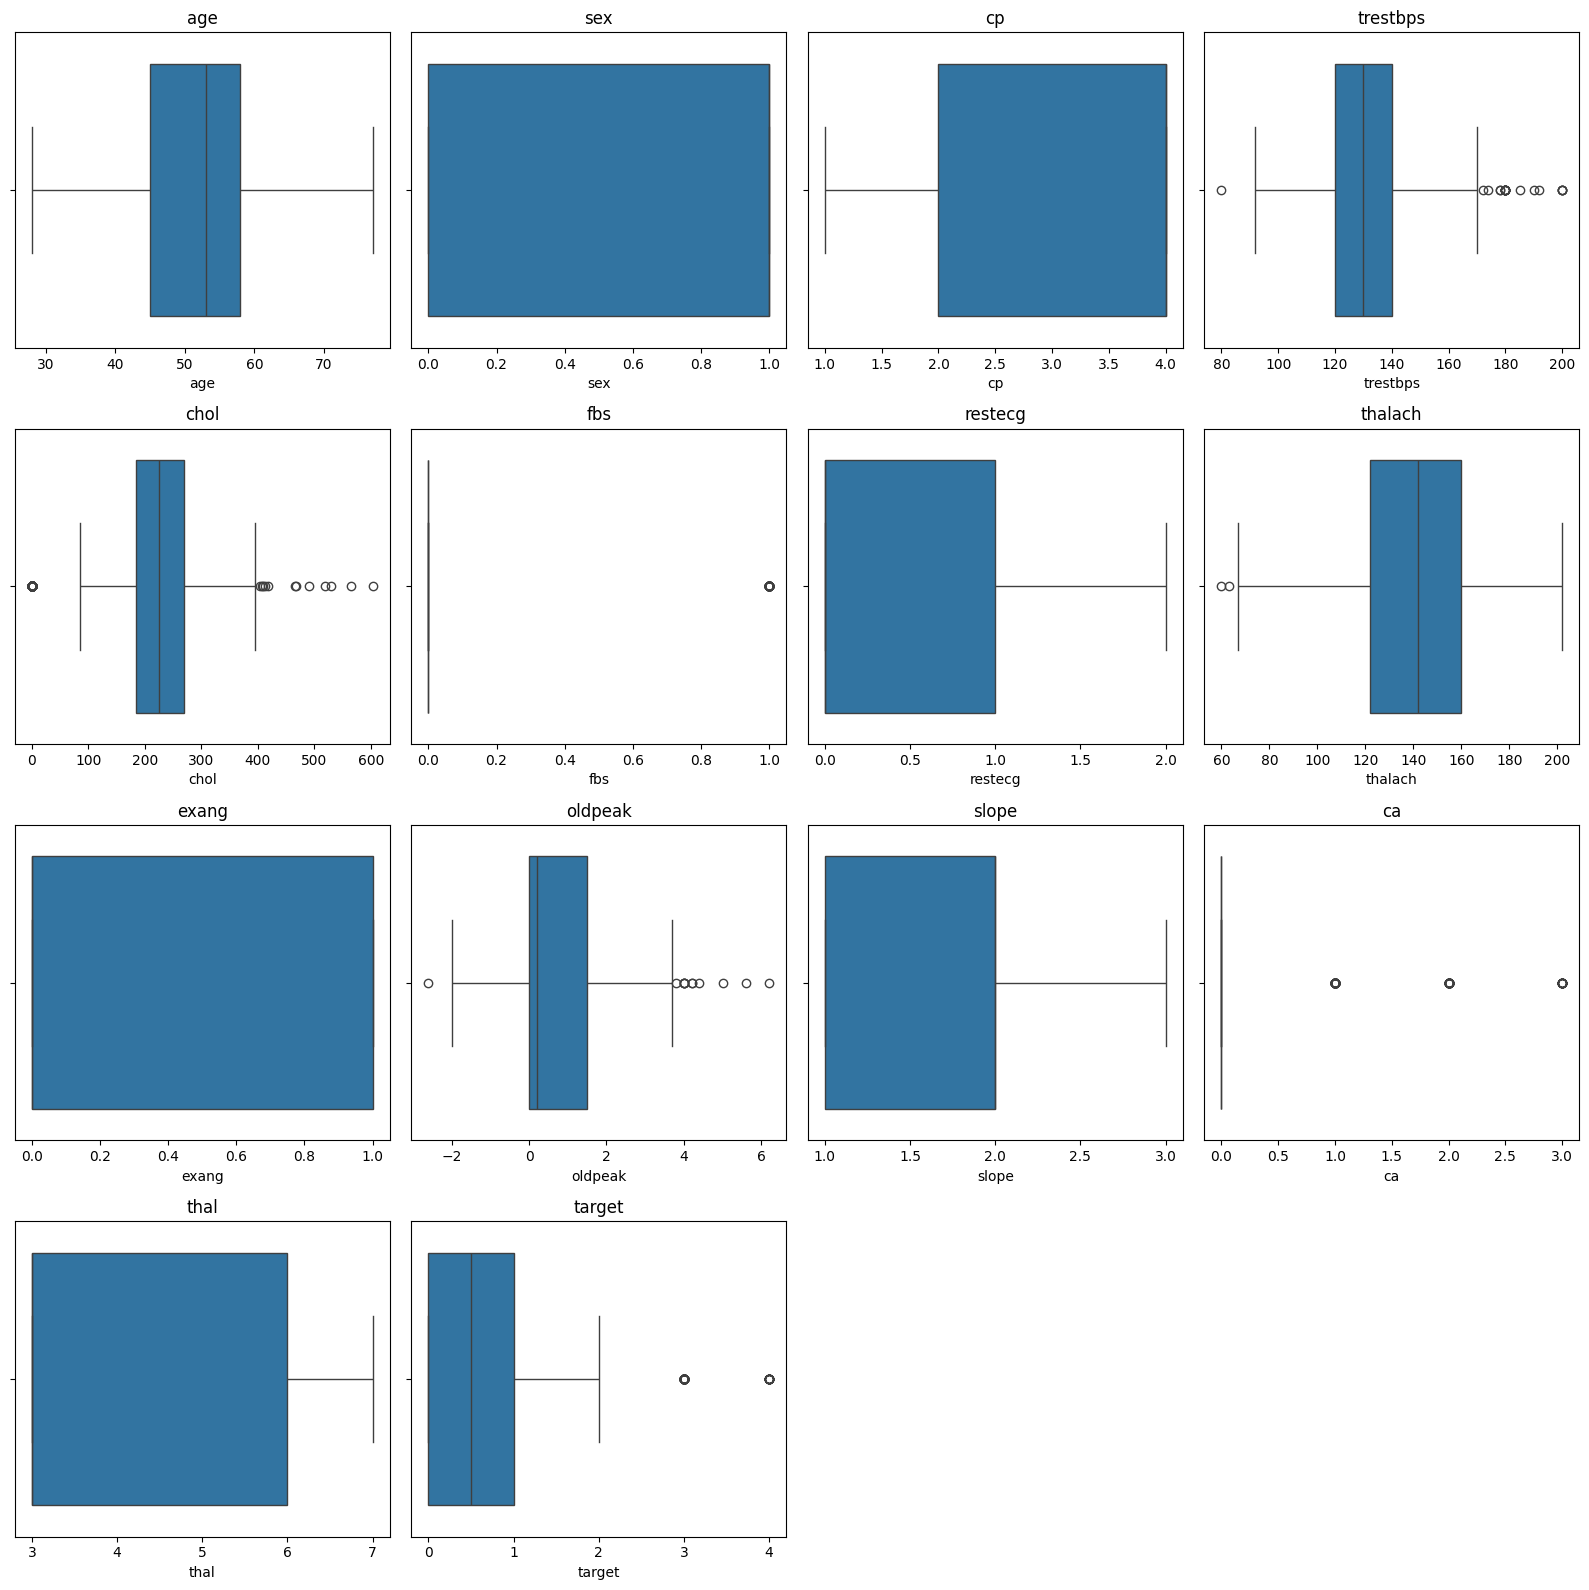

In [130]:
def visBoxplots(df):
    
    numeric_cols = df.select_dtypes(include=['number']).columns 
    cols = len(df.select_dtypes(include=['number']).columns)
    
    rows = (cols + 3) // 4
    cols = min(cols, 4)
    
    fig,axes = plt.subplots(rows, cols, figsize=(16, 4*rows))
    
    if rows > 1:
        axes = axes.flatten()
        
    for i, col in enumerate(numeric_cols):
        sns.boxplot(x=df[col],ax=axes[i])
        axes[i].set_title(col)
        
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

visBoxplots(df)

In [142]:
from sklearn.neighbors import LocalOutlierFactor

y = df['target']

Original shape: (720, 14)
Cleaned shape: (648, 14)
